In [1]:
%pylab inline
import prettysounds
import os
repo_dir = '/Users/Torben/Code/prettysounds/'

/Users/Torben/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


reshaping image to 100x120
writing midi file


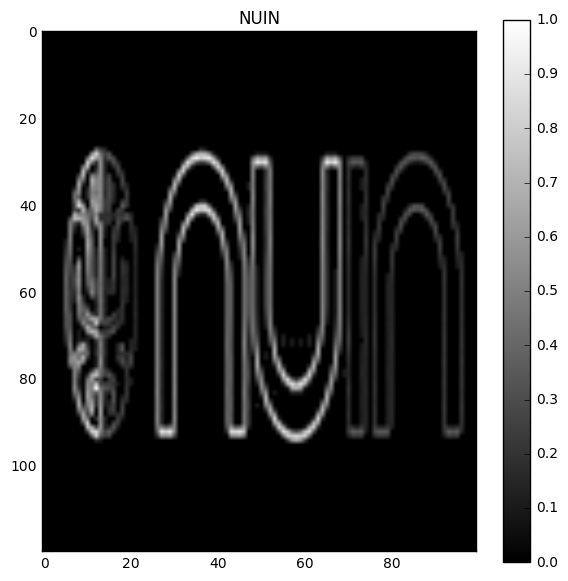

In [6]:
# path to image
image_file = os.path.join(repo_dir,'nuin_logo.png')
# resize the image
reshape_params=[100,120]
image_mat = prettysounds.preprocess_image(image_file,reshape_params=reshape_params,mask_thresh=0.1)

# Vanilla image to midi. 
fig = prettysounds.plot_grayscale_img(image_mat,title='NUIN')
output_file = os.path.join(repo_dir,'nuin.mid')
c=0;
a=8;
prettysounds.matrix_to_midi(image_mat, first_note=c, tempo=250, output_file=output_file);


writing midi file


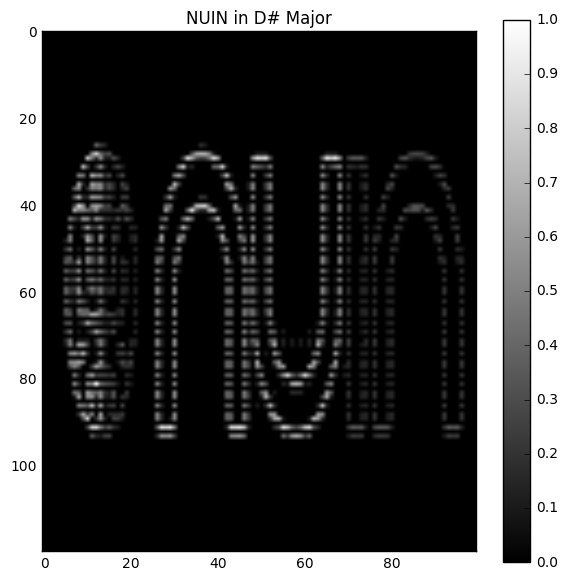

In [7]:
# fitting an image to a scale
major_scale=np.asarray([0,2,4,5,7,9,11])
minor_scale=np.asarray([0,2,3,5,7,8,10])

music_mat = prettysounds.add_music(image_mat,scale_template=major_scale,method='round')
fig = prettysounds.plot_grayscale_img(music_mat,title='NUIN in D# Major');
output_file2 = os.path.join(repo_dir,'nuin_D.mid')
prettysounds.matrix_to_midi(music_mat, first_note=3, tempo=250, output_file=output_file2);


writing midi file


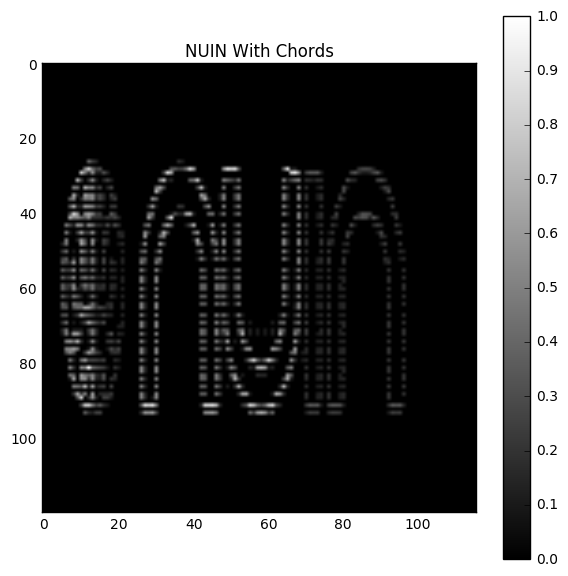

In [8]:
chord_array = [0,5,7,7];
scale_templates = [major_scale,minor_scale,major_scale,major_scale]
chord_change_mat = prettysounds.apply_chord_changes(image_mat,chord_array)
fig = prettysounds.plot_grayscale_img(chord_change_mat,title='NUIN With Chords');
output_file3 = os.path.join(repo_dir,'NUIN_C_Maj_145chords.mid')
prettysounds.matrix_to_midi(chord_change_mat, first_note=0, tempo=250, output_file=output_file3);

reshaping image to 50x125
writing midi file


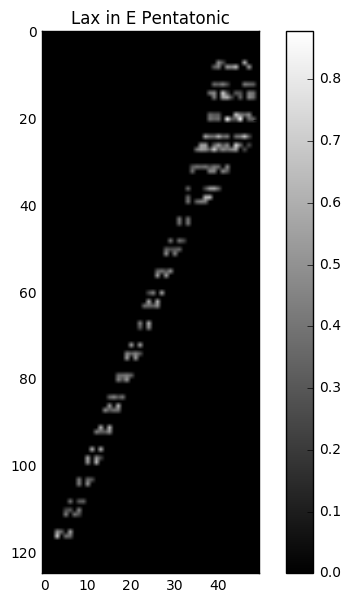

In [11]:
# Lacrosse image in E Pentatonic
pentatonic_scale=np.asarray([0,2,3,7,8])
image_file = os.path.join(repo_dir,'lax.jpg')
reshape_params=[50,125] 
image_mat = prettysounds.preprocess_image(image_file,reshape_params=reshape_params)
music_mat = prettysounds.add_music(image_mat,scale_template=pentatonic_scale,method='slice')
fig = prettysounds.plot_grayscale_img(music_mat,title='Lax in E Pentatonic');
output_file = os.path.join(repo_dir,'lax_E_Pent.mid')
prettysounds.matrix_to_midi(music_mat, first_note=4, tempo=250, output_file=output_file);


reshaping image to 100x125
writing midi file


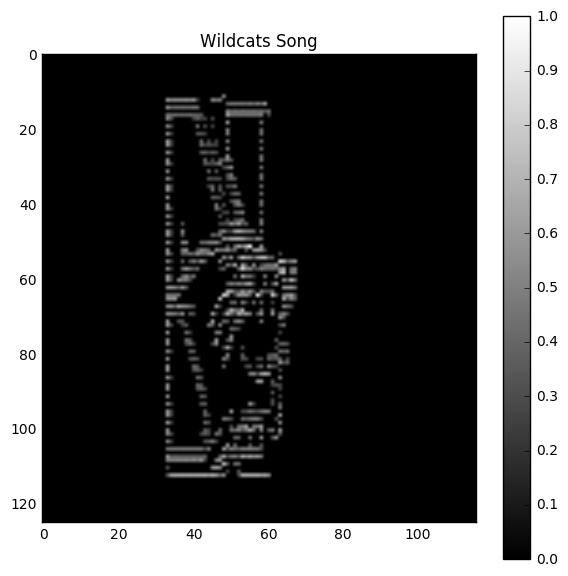

In [17]:

# Wildcats song
image_file = os.path.join(repo_dir,'northwestern-wildcats.png')
reshape_params=[100,125] 
image_mat = prettysounds.preprocess_image(image_file,reshape_params=reshape_params)
chord_array = [0,4,5,7];
major_scale=np.asarray([0,2,4,5,7,9,11])
minor_scale=np.asarray([0,2,3,5,7,8,10])

scale_templates = [major_scale,minor_scale,major_scale,major_scale]
chord_change_mat = prettysounds.apply_chord_changes(image_mat,chord_array)
fig = prettysounds.plot_grayscale_img(chord_change_mat,title='Wildcats Song');
output_file = os.path.join(repo_dir,'wildcats_C#_Maj.mid')
prettysounds.matrix_to_midi(chord_change_mat, first_note=0, tempo=250, output_file=output_file);

reshaping image to 100x80
writing midi file


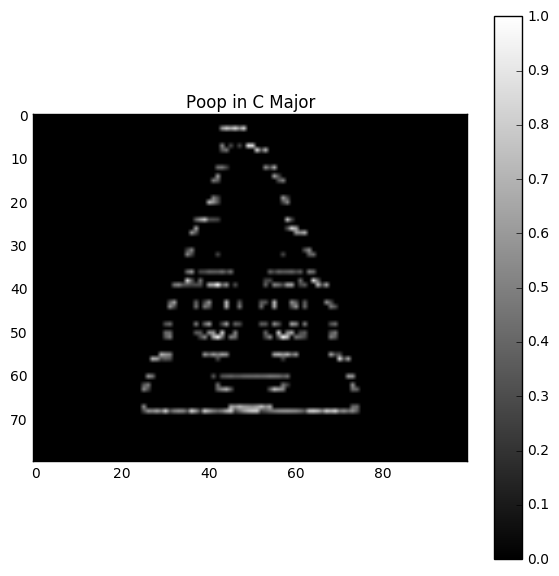

In [21]:
# Poop in C Major
major_scale=np.asarray([0,2,4,5,7,9,11])
image_file = os.path.join(repo_dir,'poop_emoji.jpg')
reshape_params=[100,80] 
image_mat = prettysounds.preprocess_image(image_file,reshape_params=reshape_params)
music_mat = prettysounds.add_music(image_mat,scale_template=pentatonic_scale,method='round')
fig = prettysounds.plot_grayscale_img(music_mat,title='Poop in C Major');
output_file = os.path.join(repo_dir,'poop.mid')
prettysounds.matrix_to_midi(music_mat, first_note=0, tempo=250, output_file=output_file);


reshaping image to 75x100
writing midi file


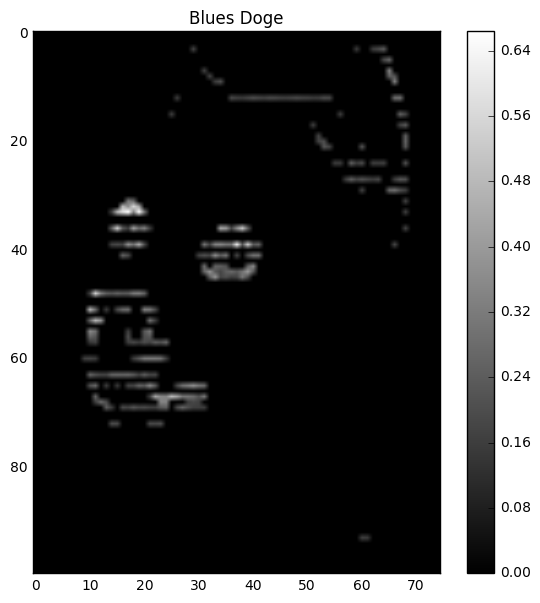

In [19]:
# Lacrosse image in E Pentatonic
blues_scale=np.asarray([0,3,5,7,8,9])
image_file = os.path.join(repo_dir,'doge.jpeg')
reshape_params=[75,100] 
image_mat = prettysounds.preprocess_image(image_file,reshape_params=reshape_params,mask_thresh=0.15)
music_mat = prettysounds.add_music(image_mat,scale_template=blues_scale,method='round')
fig = prettysounds.plot_grayscale_img(music_mat,title='Blues Doge');
output_file = os.path.join(repo_dir,'doge_blues.mid')
prettysounds.matrix_to_midi(music_mat, first_note=0, tempo=250, output_file=output_file);


reshaping image to 100x100
writing midi file


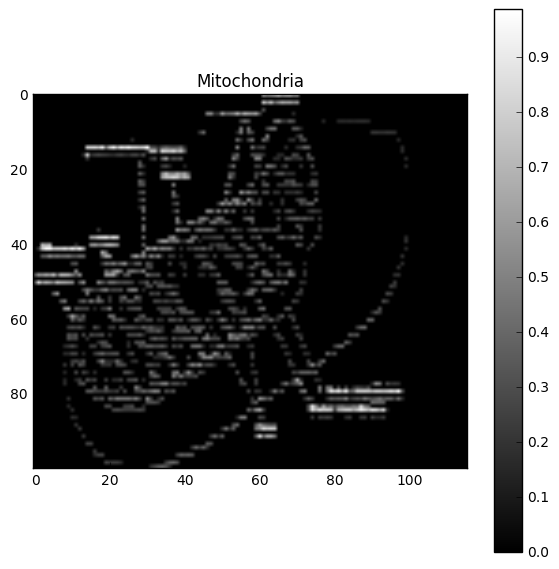

In [31]:
# Lacrosse image in E Pentatonic
minor_scale=np.asarray([0,2,3,5,7,8,10])
image_file = os.path.join(repo_dir,'mitochondria.jpg')
reshape_params=[100,100] 
image_mat = prettysounds.preprocess_image(image_file,reshape_params=reshape_params,mask_thresh=0.15)
chord_array = [0,7,10,5];
scale_templates = [major_scale,minor_scale,major_scale,major_scale]
chord_change_mat = prettysounds.apply_chord_changes(image_mat,chord_array)
fig = prettysounds.plot_grayscale_img(chord_change_mat,title='Mitochondria');
output_file = os.path.join(repo_dir,'mitochondria.mid')
prettysounds.matrix_to_midi(music_mat, first_note=0, tempo=250, output_file=output_file);


reshaping image to 75x75
writing midi file


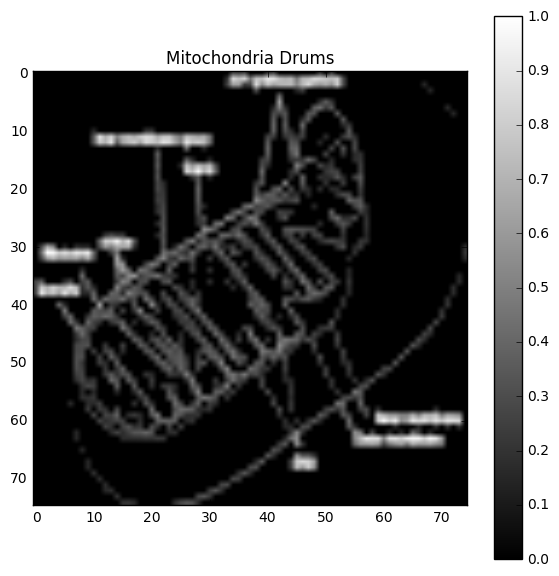

In [29]:
# Lacrosse image in E Pentatonic
minor_scale=np.asarray([0,2,3,5,7,8,10])
image_file = os.path.join(repo_dir,'mitochondria.jpg')
reshape_params=[75,75] 
image_mat = prettysounds.preprocess_image(image_file,reshape_params=reshape_params,mask_thresh=0.15)

fig = prettysounds.plot_grayscale_img(image_mat,title='Mitochondria Drums');
output_file = os.path.join(repo_dir,'mitochondria_drums.mid')
prettysounds.matrix_to_midi(music_mat, first_note=0, tempo=250, output_file=output_file);


In [ ]:
# work in progress
# my_midi_file = '/Users/Torben/Code/prettysounds/bach_demo.mid'
# my_wav_file = '/Users/Torben/Code/prettysounds/jack.wav'
# fs = FluidSynth()
# fs.midi_to_audio(my_midi_file,my_wav_file)